# MURCHIE85 TWITTER ANALYTICS (TOPIC = #SEXSTRIKE)

  
    

![image](https://i.ytimg.com/vi/VCJfT9CTuds/maxresdefault.jpg)


This repo is for pulling metrics on a given keyword (best use keywords that are hashtagged) and performs a series of reporting and analysis.



## AUTOMATED RESEARCH SUMMARY


The majority of tweeters on this topic describe themselves in their Bio with **'God'** , **'Trump'** **love** and **'#MAGA'**
The top most popular words tweeted are :

- **sex**
- **#SexStrike**
- **women**
- **#white**
- **men**
- **liberal**
- **#Alyssa_Milano**
- **straight**
- **@ErisofEliza**
- **confession**



VIEWS WERE MOSTLY : **SUBJECTIVE**  (40%) & **NEGATIVELY-SUBJECTIVE** (30%)




## OVERVIEW

**SKIP TO BOTTOM FOR FULL RESULTS & GRAPH BREAKDOWN **

- Pulls live tweets from all over twitter 
- Imports Tweepy Library 
- Consumes Twitter API 
- Desgined to be keyword driven
- All metrics can be captured
- No limit on Runtime (best to terminate when you want)

## Limitations & info
1. LOCATION filter is tricky
2. Streaming connects to the “public streams” (all public data) 
3. This is data provided by the Twitter API which accesses their database, the maintenence of DB and thus data quality is managed by Twitter

Example of parameter setting done in stream filter 

```
stream.filter(follow=["2211149702"])
```


### AUTHOR : ADAM MCMURCHIE 

![image](https://s3.amazonaws.com/re-work-production/avatars/1104/original.png?1485507466)

Github [here](https://github.com/murchie85)  

Mysite [here](https://murchie85.github.io/)

# AUTHENTICATION

You will need to change f variable to point to your credentials file, I save mines in a text file and split the comma. Not uploaded to this repo obviously.

In [9]:
import datetime


f = open("../donotgit/access.txt", "r")
keys = f.read()
f.close()
keys  = keys.split(',')
#print("Access Keys are : " + str(keys))
ACCESS_TOKEN = keys[0]
ACCESS_SECRET = keys[1]


f = open("../donotgit/consumer.txt", "r")
keys = f.read()
keys  = keys.split(',')
#print("Consumer Keys are : " + str(keys))
CONSUMER_KEY = keys[0]
CONSUMER_SECRET = keys[1]


# PULLING DOWN THE DATA 

This is where the magic happens, api authentication is set up, tweepy library is imported for the work and a class allow us to pull live data. This is appended to array for processing later. 

If you want to change the parameters, edit the following line:  

```
stream.filter(track=["SexStrike"],languages=["en"])
```

*NOTE* -   this will just keep running until you force terminate, i haven't added in a terminate loop yet.

In [16]:
from ipywidgets import IntProgress
from IPython.display import display
import time

import sys
# Import the necessary package to process data in JSON format
try:
    import json
except ImportError:
    import simplejson as json

# Import the tweepy library
import tweepy

# Variables that contains the user credentials to access Twitter API 
# Captured earlier 

# Setup tweepy to authenticate with Twitter credentials:

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

# Create the api to connect to twitter with your creadentials
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)

status_array = []


max_count = 100

f = IntProgress(min=0, max=max_count) # instantiate the bar
display(f) # display the bar



class StreamListener(tweepy.StreamListener):
    tweet_number=0   # class variable
    


    def on_status(self, status):
        self.max_tweets=max_count # max number of tweets
        self.tweet_number+=1   
        f.value += 1 # signal to increment the progress bar
        time.sleep(.1)
        status_array.append(status._json)

        if self.tweet_number>=self.max_tweets:
            sys.exit('PROCESSING COMPLETE : '+str(self.max_tweets)+' tweets processed.')

        
    def on_error(self, status_code):
        if status_code == 420:
            return False

stream_listener = StreamListener()
stream = tweepy.Stream(auth=api.auth, listener=stream_listener)

print('Pulling down data.....')
stream.filter(track=["SexStrike"],languages=["en"])



Pulling down data.....


SystemExit: Limit of 100 tweets reached.

/Users/adammcmurchie/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# PRINT AND SAVE DATA

This section allows me to pull the recently mined data into a file in raw format incase i need it later.

In [17]:
currentDT = datetime.datetime.now()
filename = "data/streamout-" + str(currentDT) + ".txt"

print(filename)

with open(filename, 'w') as f:
    for item in status_array:
        f.write("%s\n" % item)
f.close()

data/streamout-2019-05-12 22:46:05.642310.txt


# STREAM METADATA

In [18]:
print('Number of records')
print(len(status_array))
print('')
print('The data keys are : ')
print(status_array[0].keys())
print('')
print('An example element looks like: ')

Number of records
100

The data keys are : 
dict_keys(['created_at', 'id', 'id_str', 'text', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted', 'filter_level', 'lang', 'timestamp_ms'])

An example element looks like: 


# REPORT GENERATION

In [19]:
# WRITE OUT FULL REPORT
reportfile = "reports/printout-"+ str(currentDT) + ".txt"
descriptionfile = "data/description/printout-"+ str(currentDT) + ".txt"
tweetfile = "data/tweet/printout-"+ str(currentDT) + ".txt"

REPORTCOUNT = 0
with open(reportfile, 'w') as f:
    for y in range(0, len(status_array)):
        REPORTCOUNT = REPORTCOUNT + 1
        f.write('************************************************************\n')
        f.write(status_array[y]['text'])
        f.write('------------------------------\n')
        f.write(status_array[y]['created_at'])
        f.write('------------------------------\n')
        f.write(status_array[y]['user']['name'])
        f.write('------------------------------\n')
        f.write(str(status_array[y]['user']['location']))
        f.write('------------------------------\n')
        f.write(str(status_array[y]['user']['description']))
        f.write('--------------REPLY COUNT----------------\n|')
        f.write(str(status_array[y]['reply_count']))
        f.write('--------------RETWEET COUNT----------------\n')
        f.write(str(status_array[y]['retweet_count']))
        f.write('--------------RETWEETED?----------------\n')
        f.write(str(status_array[y]['retweeted']))
        f.write('--------------RETWEET COUNT----------------\n')
        f.write(str(status_array[y]['retweet_count']))
        f.write('--------------FAVOURITED----------------\n')
        f.write(str(status_array[y]['favorited']))
        f.write('--------------FAVOURITE COUNT----------------\n')
        f.write(str(status_array[y]['favorite_count']))
        f.write('\n')
        f.write('\n')
    f.write('number of records are : ')
    f.write(str(REPORTCOUNT))
        
f.close()
    
    
# WRITE OUT ONLY DESCRIPTION
    
REPORTCOUNT = 0
with open(descriptionfile, 'w') as f:
    for y in range(0, len(status_array)):
        REPORTCOUNT = REPORTCOUNT + 1
        f.write('************************************************************\n')
        f.write(str(status_array[y]['user']['description']))
        f.write('\n')
    f.write('number of records are : ')
    f.write(str(REPORTCOUNT))
        
f.close()
    

# WRITE OUT ONLY TWEET
    
REPORTCOUNT = 0
with open(tweetfile, 'w') as f:
    for y in range(0, len(status_array)):
        REPORTCOUNT = REPORTCOUNT + 1
        f.write('************************************************************\n')
        f.write(status_array[y]['text'])
        f.write('\n')
    f.write('number of records are : ')
    f.write(str(REPORTCOUNT))
        
f.close()

    
    
    
    
    
print('=========================SAMPLE OUTPUT================================')
print('************************************************************')
print(status_array[0]['text'])
print('------------------------------')
print(status_array[0]['created_at'])
print('------------------------------')
print(status_array[0]['user']['name'])
print('------------------------------')
print(status_array[0]['user']['location'])
print('------------------------------')
print(status_array[0]['user']['description'])
print('--------------REPLY COUNT----------------')
print(status_array[0]['reply_count'])
print('--------------RETWEET COUNT----------------')
print(status_array[0]['retweet_count'])
print('--------------RETWEETED?----------------') 
print(status_array[0]['retweeted'])
print('--------------RETWEET COUNT----------------')
print(status_array[0]['retweet_count'])
print('--------------FAVOURITED----------------')
print(status_array[0]['favorited'])
print('--------------FAVOURITE COUNT----------------')
print(status_array[0]['favorite_count'])



=========================SAMPLE OUTPUT================================
************************************************************
RT @TimRunsHisMouth: Just a quick FYI... 

Other consenting adults actually have to want to have sex with you in order for you to be able t…
------------------------------
Sun May 12 21:42:56 +0000 2019
------------------------------
Marilyn⭐️⭐️⭐️
------------------------------
None
------------------------------
#MAGA #KAG #NRA #TRUMP #WWG1WGA #QAnon #AmericaFirst #BuildTheWall #BlueLivesMatter #USMilitary #VETS #ISTANDWITHGENFLYNN
--------------REPLY COUNT----------------
0
--------------RETWEET COUNT----------------
0
--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
--------------FAVOURITED----------------
False
--------------FAVOURITE COUNT----------------
0


## USER DESCRIPTION NUMERICAL ANALYSIS

In [6]:
MAGA_COUNT = 0
LGBT_COUNT = 0 
VAR_COUNT = 0 
linecount = 0
APPENDED_DESCRIPTION = ""
for x in range(0, len(status_array)):
    linecount = linecount + 1
    description = status_array[x]['user']['description']
    APPENDED_DESCRIPTION = APPENDED_DESCRIPTION + str(description)
    if str(description).count('MAGA') >= 1:
        MAGA_COUNT = MAGA_COUNT + 1

    if str(description).count('LGBT') >= 1:
        LGBT_COUNT = LGBT_COUNT + 1

    if str(description).count('femi') >= 1:
        VAR_COUNT = VAR_COUNT + 1
    
print(MAGA_COUNT)
print(LGBT_COUNT)
print(VAR_COUNT)
print(linecount)


    

187
4
16
1271


In [7]:
from collections import Counter, OrderedDict
DISC = APPENDED_DESCRIPTION.split()
x = Counter(DISC)
del x["and"], x["the"], x["of"],x["to"], x["a"], x["I"], x["&"], x["in"], x["for"], x["my"], x["is"], x["the"], x["are"], x["you"], x["on"]
del x["with"], x["not"], x["but"], x["be"], x["The"], x["No"], x["who"], x["|"], x["about"], x["that"], x["your"], x["•"], x['from'], x['-'], x['it'], x['am'], x[','], x['like'],x['just']
del x['It'], x['A'],x['our'],x['this'],x['have'],x['by'],x['an'],x['going'],x['they'],x['having']


      
            
top_desc = OrderedDict(x.most_common(20))
print(top_desc)


OrderedDict([('#MAGA', 65), ('all', 42), ('Trump', 41), ('🇺🇸', 36), ('love', 36), ('or', 34), ('at', 30), ('American', 29), ('more', 28), ('me', 27), ('#2A', 26), ('Proud', 25), ('God', 25), ('will', 25), ('follow', 24), ('Love', 24), ('as', 24), ("I'm", 23), ('President', 22), ('so', 21)])


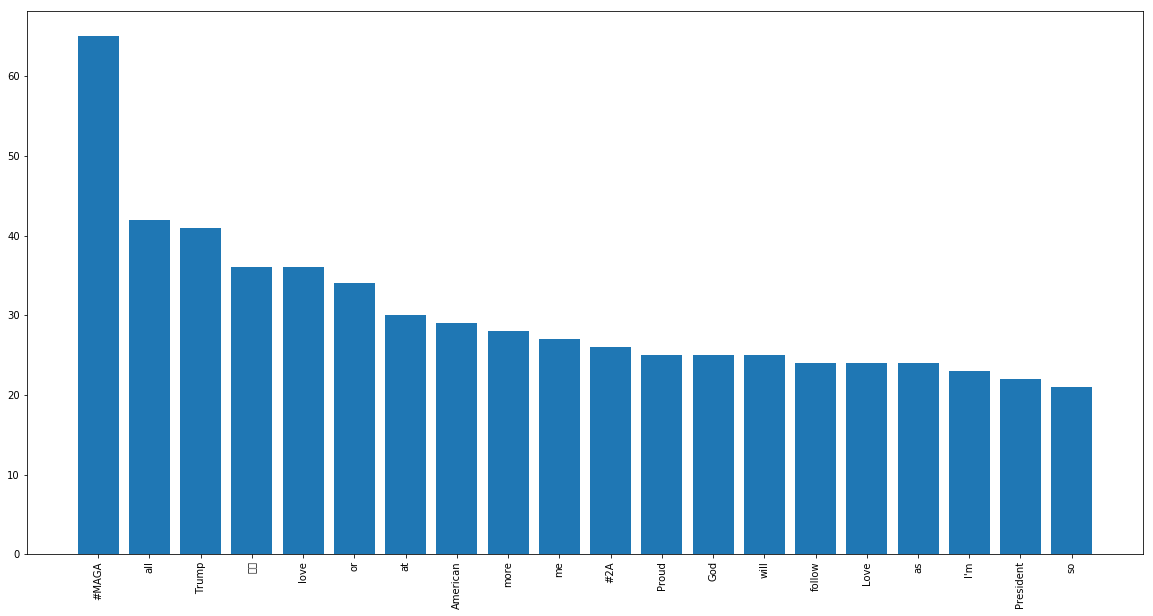

In [13]:
import matplotlib.pyplot as plt

D = top_desc

plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()), rotation='vertical')
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

## TWEET NUMERICAL ANALYSIS

In [9]:
MAGA_COUNT = 0
LGBT_COUNT = 0 
VAR_COUNT = 0 
linecount = 0
APPENDED_TEXT = ""


for x in range(0, len(status_array)):
    linecount = linecount + 1
    text = status_array[x]['text']
    APPENDED_TEXT = APPENDED_TEXT + str(text)
    
    
    if str(text).count('MAGA') >= 1:
        MAGA_COUNT = MAGA_COUNT + 1

    if str(text).count('LGBT') >= 1:
        LGBT_COUNT = LGBT_COUNT + 1

    if str(text).count('femi') >= 1:
        VAR_COUNT = VAR_COUNT + 1
        
print(MAGA_COUNT)
print(LGBT_COUNT)
print(VAR_COUNT)
print(linecount)


25
10
42
1271


In [10]:
len(APPENDED_TEXT)

160807

In [11]:
from collections import Counter, OrderedDict
DISC = APPENDED_TEXT.split()
x = Counter(DISC)
del x["and"], x["the"], x["of"],x["to"], x["a"], x["I"], x["&"], x["in"], x["for"], x["my"], x["is"], x["the"], x["are"], x["you"], x["on"]
del x["with"], x["not"], x["but"], x["be"], x["The"], x["No"], x["who"], x["|"], x["about"], x["that"], x["your"], x["•"], x['from'], x['-'], x['it'], x['am'], x[','], x['like'],x['just']
del x['It'], x['A'],x['our'],x['this'],x['have'],x['by'],x['an'],x['going'],x['they'],x['having']

top_tweets = OrderedDict(x.most_common(20))
print(top_tweets)


OrderedDict([('sex', 456), ('#SexStrike', 389), ('women', 326), ('men', 169), ('we', 110), ('liberal', 109), ('#sexstrike', 102), ('@Alyssa_Milano', 89), ('get', 84), ('feel', 81), ('has', 80), ('being', 77), ('straight', 77), ('white', 77), ('@ErisofEliza:', 76), ('subtle', 75), ('confession', 75), ('strike', 67), ('absolu…RT', 66), ('We', 64)])


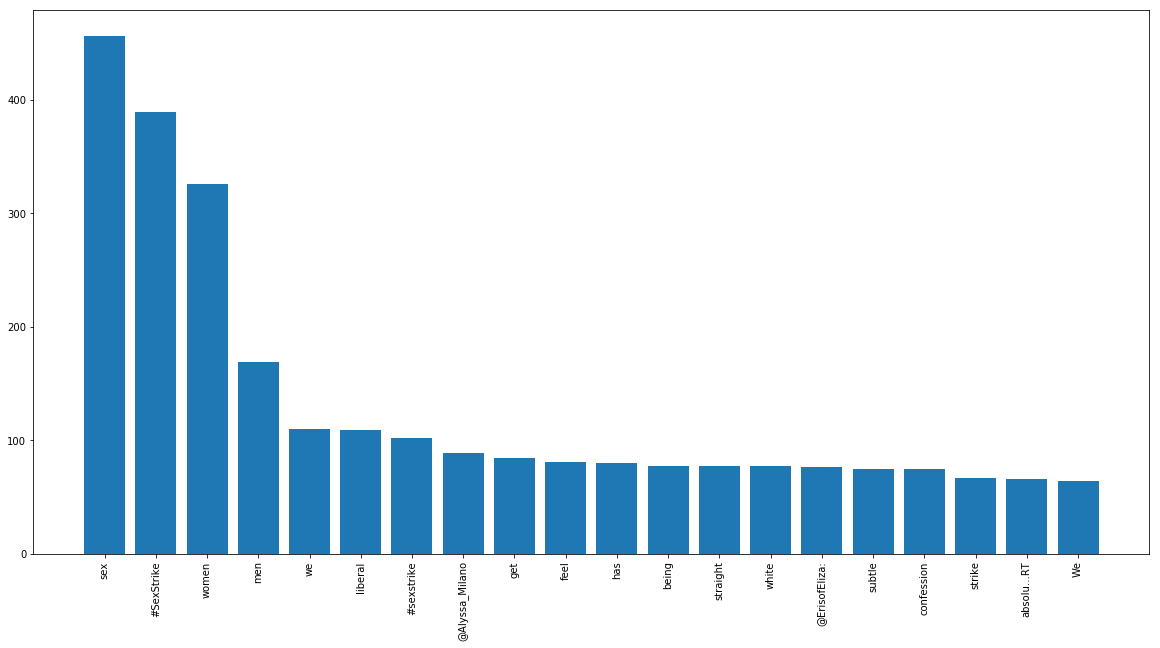

In [12]:
import matplotlib.pyplot as plt

D = top_tweets

plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()), rotation='vertical')
plt.rcParams["figure.figsize"] = (20,10)
plt.show()


# SENTIMENT ANALYSIS 

The sentiment property returns a named tuple of the form Sentiment (polarity, subjectivity). The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

# Now the Theory
Thanks to Siraj Raval and freecode camp for the sample here

TextBlob
TextBlob is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

A textblob can be created in the following way (example, and not part of the original code):

example = TextBlob("Python is a high-level, general-purpose programming language.")
And tokenization can be performed by the following methods:
words: returns the words of text

usage:

example.words
sentences: returns the sentences of text

usage:

example.sentences


In [12]:
from textblob import TextBlob
import tweepy

In [13]:
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
api = tweepy.API(auth)

In [14]:
public_tweets = api.search('#SexStrike')

In [15]:
objective_tweet=0
subjective_tweet=0
negitively_subjective=0
for tweet in public_tweets:
    print(tweet.text)
    analysis = TextBlob(tweet.text)
    print(analysis.sentiment)
    if analysis.sentiment[0]>0:
       subjective_tweet = subjective_tweet + 1
       print('Subjective')
    elif analysis.sentiment[0]<0:
       negitively_subjective = negitively_subjective  + 1
       print('Negatively subjective')
    else:
       objective_tweet = objective_tweet + 1
       print('objective')
    print('\n')
    
print('objective_tweets : '+str(objective_tweet))
print('subjective_tweets : '+str(subjective_tweet))
print('negitively_subjective tweets: '+str(negitively_subjective))

@AFlyOnHerFace They have Penned Up Frustration from the #SexStrike
 CC'd @julieblue917
Sentiment(polarity=0.0, subjectivity=0.0)
objective


RT @Rebelocracy: NATIONAL POLL: 
When do you think abortion ok?

#SexStrike #Dems #Republican
Share your view in comments below.. 
RT for b…
Sentiment(polarity=0.5, subjectivity=0.5)
Subjective


@birchtreeweb @AFlyOnHerFace @elainembenes20 @Redpainter1 Please Excuse Kevin. The #SexStrike has Hit Him Where it Hurts.
Sentiment(polarity=-0.05, subjectivity=0.05)
Negatively subjective


@AOC Oh, I thought @Alyssa_Milano #sexstrike was about controlling women’s sexuality...I should probably borrow your notes again.
Sentiment(polarity=0.0, subjectivity=0.0)
objective


RT @KikiAdine: I’m sick to my stomach. 
Alabama’s gov just signed the most restrictive abortion law in history
We can’t quit
We can’t let t…
Sentiment(polarity=-0.10714285714285715, subjectivity=0.6785714285714286)
Negatively subjective


RT @tarastrong: To those who berated @Alyssa_Mila